In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization

In [13]:
from matplotlib import pyplot as plt

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

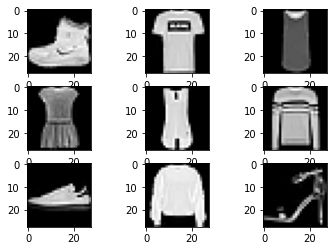

In [14]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [15]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [17]:
from tensorflow.keras.utils import to_categorical

In [20]:
def load_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return (X_train, y_train), (X_test, y_test)

In [22]:
# train_norm = X_train.astype('float32')
# test_norm = 


Epoch 00001: val_loss improved from inf to 0.32082, saving model to model-00001-0.42714.h5

Epoch 00002: val_loss improved from 0.32082 to 0.31166, saving model to model-00002-0.29047.h5

Epoch 00003: val_loss improved from 0.31166 to 0.28788, saving model to model-00003-0.24778.h5

Epoch 00004: val_loss improved from 0.28788 to 0.25506, saving model to model-00004-0.21845.h5

Epoch 00005: val_loss did not improve from 0.25506

Epoch 00006: val_loss improved from 0.25506 to 0.25489, saving model to model-00006-0.17373.h5

Epoch 00007: val_loss did not improve from 0.25489

Epoch 00008: val_loss did not improve from 0.25489

Epoch 00009: val_loss did not improve from 0.25489

Epoch 00010: val_loss did not improve from 0.25489
> 90.917

Epoch 00001: val_loss improved from inf to 0.33895, saving model to model-00001-0.44013.h5

Epoch 00002: val_loss improved from 0.33895 to 0.31622, saving model to model-00002-0.29576.h5

Epoch 00003: val_loss improved from 0.31622 to 0.25769, saving mod

<ipython-input-27-70291a65dbd7>:111: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-27-70291a65dbd7>:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)


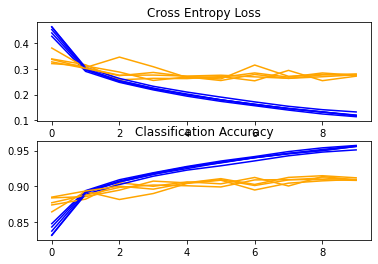

Accuracy: mean=90.978 std=0.123, n=5


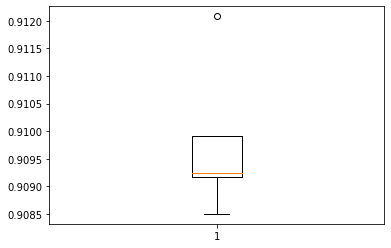

In [27]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist as mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
from datetime import datetime
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

def model_config():
    model_file_path = 'model-{epoch:05d}-{loss:.5f}.h5'
    
    checkpoint = ModelCheckpoint(
        model_file_path, 
        monitor='val_loss',
        verbose=1,
        save_best_only=True, 
        save_weights_only=False, 
        mode='auto', 
        save_freq='epoch'
    )
    LR = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.1,
        patience=5,
        verbose=1,
        mode="auto",
        min_delta=0.0001,
        cooldown=0,
        min_lr=0,
    ) 
    
    callbacks_list = [LR, checkpoint]
    
    return callbacks_list

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0,
                           
                           callbacks=model_config())
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
        
        curr_time = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M-%S')       
        model.save(f"model_{curr_time}.h5")
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
 
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

In [29]:
model = keras.models.load_model('model-00008-0.14654.h5')

In [31]:
# X_test[0]

In [34]:
model.predict(X_test[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
y_prob = model.predict(X_test[0:1]) 
y_classes = y_prob.argmax(axis=-1)

In [ ]:
c

In [36]:
y_classes

array([9], dtype=int64)

In [37]:
y_classes = tf.keras.np_utils.probas_to_classes(y_proba)

AttributeError: module 'tensorflow.keras' has no attribute 'np_utils'

In [38]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = tf.keras.datasets.fashion_mnist.load_data()

In [41]:
# y_train_orig

In [42]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

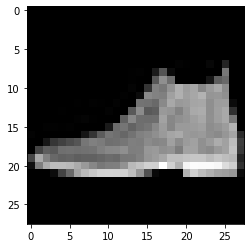

In [43]:
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))

In [45]:
# X_test[0]